In [1]:
from IPython.display import display, HTML
p="Flatness Vs Generalization Part 1:"
html_markup="<h1>" +p+ "</h1>"
display(HTML(html_markup))

Training model 
test loss -  tensor(2.2854)  epoch -  1
test loss -  tensor(0.4502)  epoch -  2
test loss -  tensor(0.2422)  epoch -  3
test loss -  tensor(0.1755)  epoch -  4
test loss -  tensor(0.1362)  epoch -  5
test loss -  tensor(0.1008)  epoch -  6
test loss -  tensor(0.1037)  epoch -  7
test loss -  tensor(0.0791)  epoch -  8
test loss -  tensor(0.0785)  epoch -  9
test loss -  tensor(0.0631)  epoch -  10
test loss -  tensor(0.0652)  epoch -  11
test loss -  tensor(0.0568)  epoch -  12
test loss -  tensor(0.0587)  epoch -  13
test loss -  tensor(0.0515)  epoch -  14
test loss -  tensor(0.0549)  epoch -  15
test loss -  tensor(0.0537)  epoch -  16
test loss -  tensor(0.0531)  epoch -  17
test loss -  tensor(0.0471)  epoch -  18
test loss -  tensor(0.0443)  epoch -  19
test loss -  tensor(0.0436)  epoch -  20
test loss -  tensor(0.0444)  epoch -  21
test loss -  tensor(0.0453)  epoch -  22
test loss -  tensor(0.0426)  epoch -  23
test loss -  tensor(0.0398)  epoch -  24
test loss

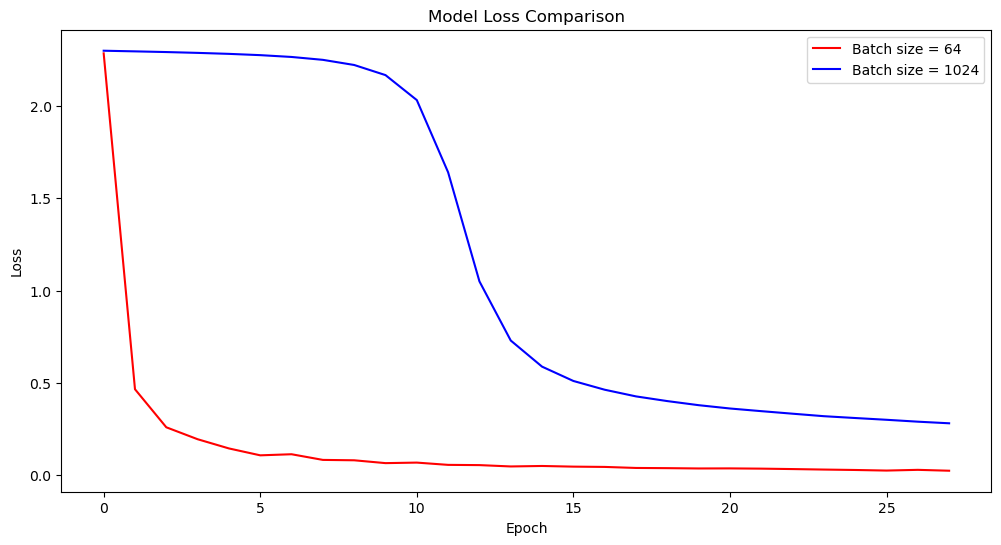

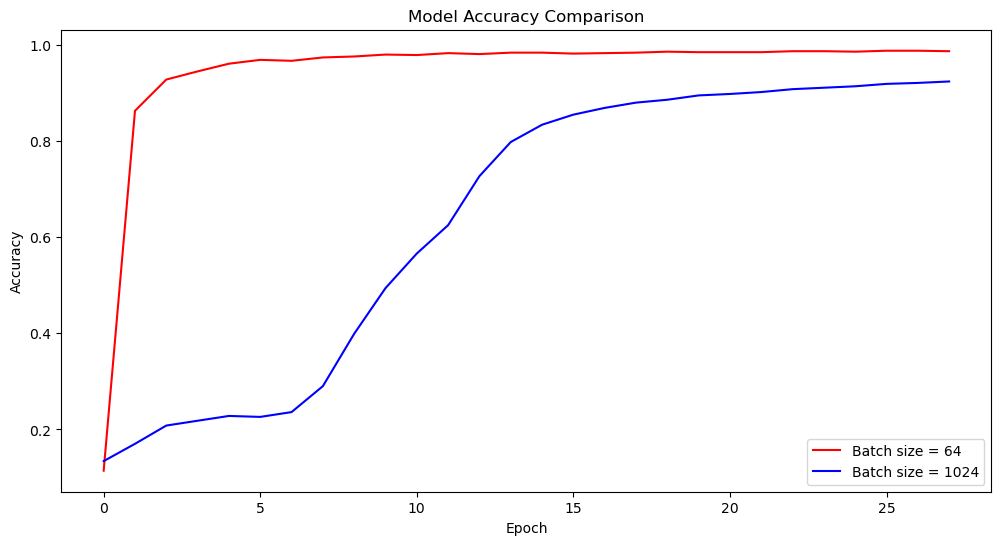

Running for alpha -  0.0
Alpha loss -  tensor(0.0381)
Running for alpha -  0.1111111111111111
Alpha loss -  tensor(0.0542)
Running for alpha -  0.2222222222222222
Alpha loss -  tensor(0.1829)
Running for alpha -  0.3333333333333333
Alpha loss -  tensor(0.6926)
Running for alpha -  0.4444444444444444
Alpha loss -  tensor(1.4355)
Running for alpha -  0.5555555555555556
Alpha loss -  tensor(1.6935)
Running for alpha -  0.6666666666666666
Alpha loss -  tensor(1.3564)
Running for alpha -  0.7777777777777777
Alpha loss -  tensor(0.7832)
Running for alpha -  0.8888888888888888
Alpha loss -  tensor(0.3865)
Running for alpha -  1.0
Alpha loss -  tensor(0.2613)


<module 'matplotlib.pyplot' from 'C:\\Users\\fujai\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

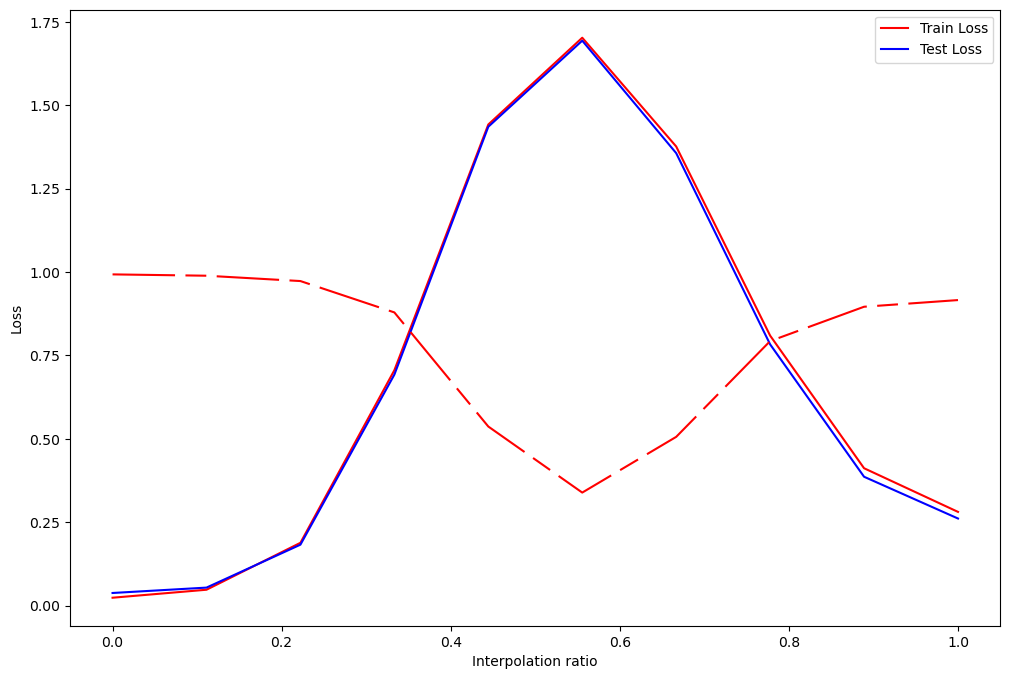

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

def data_loader(train_batch_size, test_batch_size):
    train_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size=train_batch_size, shuffle=True)

    test_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size=test_batch_size, shuffle=True)

    return train_data, test_data

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.c1 = nn.Conv2d(1, 6, 5)
        self.c2 = nn.Conv2d(6, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 120)
        self.l2 = nn.Linear(120, 84)
        self.l3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), 2)
        x = F.max_pool2d(F.relu(self.c2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

def calculate_parameters(modelName, model):
    param = sum(p.numel() for p in model.parameters())
    print('{}: {}'.format(modelName, param))
    return param

def init_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, nesterov=True)

def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

def calculate_ip_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct / total, 3)

epochs = 28

def train_models(model, optimizer, train_data, test_data):
    param_arr = []
    train_loss_arr = []
    test_loss_arr = []
    train_accuracy_arr = []
    test_accuracy_arr = []
    total_train_loss = 0
    print('Training model ')
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
        train_loss, train_acc = calculate_ip_op_diff(model, train_data)
        test_loss, test_acc = calculate_ip_op_diff(model, test_data)

        train_loss_arr.append(train_loss)
        test_loss_arr.append(test_loss)
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)
        print('test loss - ', test_loss, ' epoch - ', epoch)
    print('Training completed..')
    return train_loss_arr, test_loss_arr, train_accuracy_arr, test_accuracy_arr, param_arr

# Set batch sizes
train_data_batch_size = 64
test_data_batch_size = 64

train_data, test_data = data_loader(train_data_batch_size, test_data_batch_size)

model_1 = Model()
optimizer = init_optimizer(model_1)
train_loss_arr_b1, test_loss_arr_b1, train_accuracy_arr_b1, test_accuracy_arr_b1, param_arr_b1 = train_models(model_1, optimizer, train_data, test_data)

train_data, test_data = data_loader(1024, 1024)  # Change batch size for the second model if needed

model_2 = Model()
optimizer = init_optimizer(model_2)
train_loss_arr_b2, test_loss_arr_b2, train_accuracy_arr_b2, test_accuracy_arr_b2, param_arr_b2 = train_models(model_2, optimizer, train_data, test_data)

param_b1 = torch.nn.utils.parameters_to_vector(model_1.parameters())
param_b2 = torch.nn.utils.parameters_to_vector(model_2.parameters())

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, 28, 1), train_loss_arr_b1, color="red")
plt.plot(np.arange(0, 28, 1), train_loss_arr_b2, color="blue")
plt.title('Model Loss Comparison')
plt.legend(['Batch size = 64', 'Batch size = 1024'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b1, color="red")
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b2, color="blue")
plt.title('Model Accuracy Comparison')
plt.legend(['Batch size = 64', 'Batch size = 1024'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

alpha = np.linspace(0, 1, 10)
for i in range(len(alpha)):
    print('Running for alpha - ', alpha[i])
    theta = (1 - alpha[i]) * param_b1 + alpha[i] * param_b2
    model = Model()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()
    alpha_train_loss, alpha_train_acc = calculate_ip_op_diff(model, train_data)
    alpha_test_loss, alpha_test_acc = calculate_ip_op_diff(model, test_data)
    print('Alpha loss - ', alpha_test_loss)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

plt.figure(figsize=(12, 8))
plt.plot(alpha, alpha_train_loss_arr, color="red")
plt.plot(alpha, alpha_test_loss_arr, color="blue")
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Interpolation ratio')
plt.ylabel('Loss')
plt.plot(alpha, alpha_train_acc_arr, dashes=[30, 5, 10, 5], color="red")
plt
